# Tutorial 1: The Anatomy of a Heartbeat

Welcome to the Physics-Aware ECG Toolkit! In this first tutorial, we'll explore the fundamentals of an electrocardiogram (ECG) signal. An ECG is a simple test that records the electrical activity of your heart, giving us a picture of its rhythm.

A healthy heartbeat has a very specific, repeating pattern made up of three main parts.

### The P-QRS-T Waveform

![ECG Waveform](https://i.imgur.com/8xS7s9U.png)
*Image credit: Wikipedia*

1.  **P-Wave:** The first small bump. It represents the electrical signal that causes the atria (the top chambers of the heart) to contract.
2.  **QRS Complex:** The big, sharp spike in the middle. This is the most powerful signal, representing the contraction of the ventricles (the bottom chambers) that pump blood to the rest of the body. The highest point is the "R peak".
3.  **T-Wave:** The final, broader bump. This represents the "reset" phase, as the ventricles prepare for the next beat.

In the next cell, we'll use Python to load a real ECG signal from our dataset and see these waves for ourselves.

Current working directory set to: /Users/mohanarangandesigan/Developer/ecg-denoiser-hackathon
Attempting to load record from: data/mit-bih-arrhythmia-database-1.0.0/100
Signal loaded successfully!
Plotting the first 5 seconds of the ECG signal...


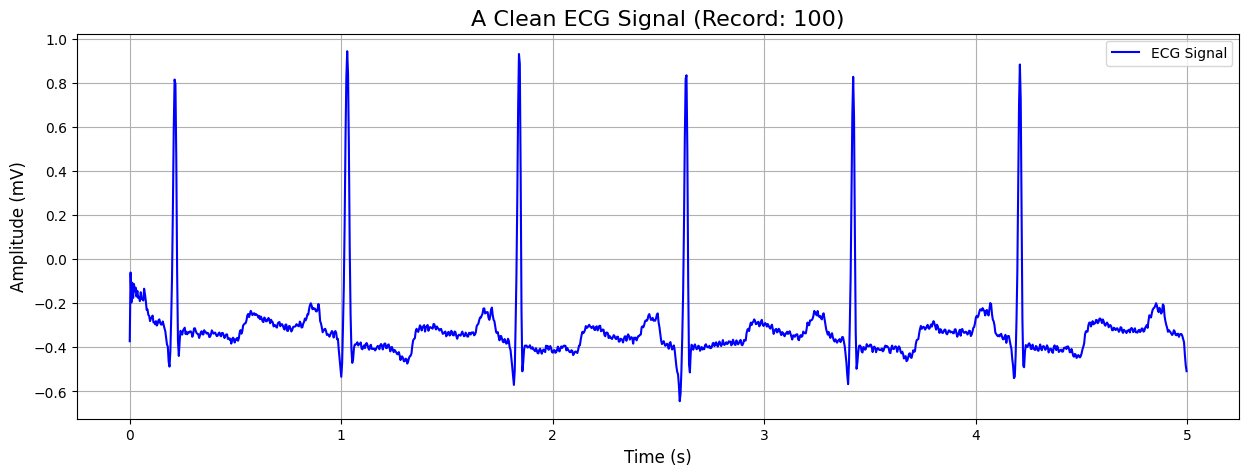

In [ ]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

if os.path.basename(os.getcwd()) == 'tutorials':
    os.chdir('..')
print(f"Current working directory set to: {os.getcwd()}")


from src.data_utils import load_and_resample_signal, TARGET_FS

# --- Configuration ---
RECORD_NAME = '100'  # A nice, clean example record from the MIT-BIH database
SECONDS_TO_PLOT = 5  # Let's look at a 5-second snippet
DATA_DIR = os.path.join('data', 'mit-bih-arrhythmia-database-1.0.0') # Paths are now simple
record_path = os.path.join(DATA_DIR, RECORD_NAME)

# --- Load the Data ---
print(f"Attempting to load record from: {record_path}")
signal = load_and_resample_signal(record_path, TARGET_FS)

# Check if the signal was loaded successfully
if signal is None:
    print("\n\nERROR: Signal could not be loaded!")
    print("Please make sure you have unzipped the datasets in the 'data' directory.")
else:
    print("Signal loaded successfully!")

    # --- Prepare for Plotting ---
    num_samples_to_plot = int(SECONDS_TO_PLOT * TARGET_FS)
    time_axis = np.arange(num_samples_to_plot) / TARGET_FS

    # --- Create the Plot ---
    print("Plotting the first 5 seconds of the ECG signal...")
    plt.figure(figsize=(15, 5))
    plt.plot(time_axis, signal[:num_samples_to_plot], label='ECG Signal', color='blue')
    plt.title(f'A Clean ECG Signal (Record: {RECORD_NAME})', fontsize=16)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Amplitude (mV)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

## Identifying the Key Features

Look at the plot above. Can you spot the repeating patterns?

Each of those sharp spikes is a **QRS complex**, representing one full heartbeat. You can clearly see the smaller **T-wave** after each spike. The **P-wave** is the tiny bump just before the spike, and it can sometimes be hard to see!

This clean, regular pattern is the signature of a healthy heart rhythm.

---

## An Introduction to Signal Filtering

One of the oldest ways to clean up a signal is to use a **digital filter**. A filter can be designed to remove specific frequencies from a signal. For example, we can use a **band-pass filter** to keep the frequencies that are most important for an ECG and remove the very low and very high frequencies where noise often lives.

Let's apply a simple filter to our signal and see what happens.

In [8]:
# Import the signal processing tools from the SciPy library
from scipy.signal import butter, filtfilt

# --- Define the Filter ---
# We'll design a "Butterworth" band-pass filter.
# It will keep frequencies between 0.5 Hz and 40 Hz.
LOWCUT = 0.5
HIGHCUT = 40.0
ORDER = 2 # The "steepness" of the filter

# A function to apply our filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# --- Apply the Filter ---
print("Applying a band-pass filter to the signal...")
filtered_signal = butter_bandpass_filter(signal, LOWCUT, HIGHCUT, TARGET_FS, order=ORDER)
print("Filtering complete.")

Applying a band-pass filter to the signal...
Filtering complete.


Plotting the original vs. the filtered signal...


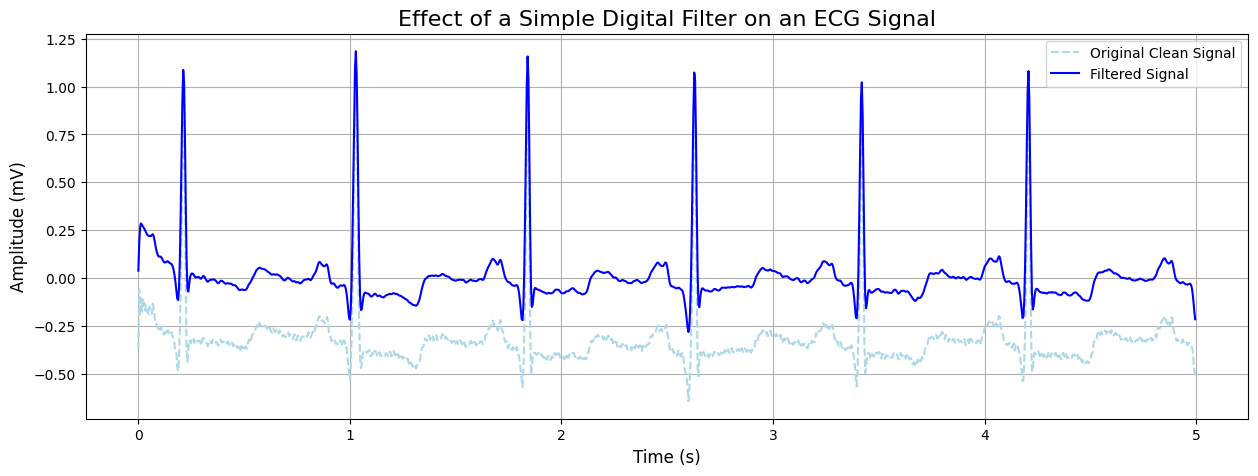

In [9]:
# --- Plot the Comparison ---
print("Plotting the original vs. the filtered signal...")

plt.figure(figsize=(15, 5))
# Plot the first 5 seconds of both signals
plt.plot(time_axis, signal[:num_samples_to_plot], label='Original Clean Signal', color='lightblue', linestyle='--')
plt.plot(time_axis, filtered_signal[:num_samples_to_plot], label='Filtered Signal', color='blue', linewidth=1.5)

plt.title('Effect of a Simple Digital Filter on an ECG Signal', fontsize=16)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Amplitude (mV)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

## What Changed?

In the plot above, the original signal is the light blue dashed line, and the filtered signal is the solid blue line.

Notice how the filtered signal is a bit smoother? The filter has removed some of the very subtle, high-frequency "wiggles" from the baseline.

**The Challenge with Simple Filters:** While filters are great for removing known types of noise (like the 60Hz hum from power lines), they can be a blunt instrument. A poorly designed filter can accidentally remove the sharp, important details of the QRS complex, which could hide signs of a real problem.

This is why we turn to AI. An AI-powered denoiser can learn the complex patterns of *both* the signal and the noise, allowing it to perform a much more intelligent and targeted cleaning.

**In the next tutorial, we'll intentionally add severe noise to our signal and use our pretrained AI model to restore it!**